<a href="https://colab.research.google.com/github/R4HUL-ROY/Multimodal_Results/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 668.3 MB 11.2 MB/s
     |████████████████████████████████| 462 kB 8.8 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 43 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.downloa

In [2]:
# !pip install -q tensorflow_text
!pip install fasttext
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pathlib
import tensorflow as tf
import fasttext.util

# import tensorflow_hub as hub
# import tensorflow_text as text
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, Adamax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.2 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3145252 sha256=67504caf4084486f2249c13c7631d2210dd60dd8a0e70f409db848e3ab1157b3
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [3]:
merged_dataset_path = "/content/drive/MyDrive/project_resources/merged_data_for_multimodal_model.csv"
stopwords_path = "/content/drive/MyDrive/project_resources/stopwords.txt"
glove_vector_path = '/content/drive/MyDrive/project_resources/glove.6B.200d.txt'
fasttext_model_path = 'cc.en.300.bin'

vgg16_imagenet_weight_path = "/content/drive/MyDrive/project_resources/Imagenet_weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
resnet50_imagenet_weight_path = "/content/drive/MyDrive/project_resources/Imagenet_weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
mobilenetv2_imagenet_weight_path = "/content/drive/MyDrive/project_resources/Imagenet_weights/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"

# Read the data

In [4]:
# img_data_root = pathlib.Path('/content/drive/MyDrive/Tobacco3482-jpg/')
# print(img_data_root)
# for item in img_data_root.iterdir():
#   print(item)

# print()

# text_data_root = pathlib.Path('/content/drive/MyDrive/tobaco_OCR/')
# print(text_data_root)
# for item in text_data_root.iterdir():
#   print(item)

In [ ]:
# def get_corresponding_txtpath(img_path):
#     return img_path.replace("Tobacco3482-jpg", "tobaco_OCR")[:-3] + "txt"
    

# def get_file_paths_and_labels(img_data_root, text_data_root):
#      img_paths = [str(path) for path in img_data_root.glob('*/*.jpg')]
#      text_paths = [get_corresponding_txtpath(this_path) for this_path in img_paths]
#      img_labels = [p.split("/")[-2] for p in img_paths]
#      text_labels = [p.split("/")[-2] for p in text_paths]
#      return img_paths, img_labels, text_paths, text_labels

# img_paths, img_labels, text_paths, text_labels = get_file_paths_and_labels(img_data_root, text_data_root)
# print(len(img_paths))
# print(len(img_labels))
# print(len(text_paths))
# print(len(text_labels))

In [ ]:
# def get_text_from_path(path):
#     with open(path) as f:
#         lines = f.readlines()
#         lines  = ' '.join(lines)
#         f.close()
#     return lines

# out_text = get_text_from_path('/content/drive/MyDrive/tobaco_OCR/ADVE/0000435350.txt') 
# print(out_text)

In [ ]:
# text_contains = []
# c= 0 
# for i, this_path in enumerate(text_paths):
#     text_contains.append(get_text_from_path(this_path))
#     print(c, end= " ")
#     c +=1

In [ ]:
# df = pd.DataFrame(list(zip(text_paths, text_contains, img_paths, img_labels)),
#                columns =['text_paths','texts', 'img_paths', 'data_label'])

# # Merged Dataframe
# df.head()

In [ ]:
# df.to_csv("merged_data_for_multimodal_model.csv")

In [5]:
df = pd.read_csv(merged_dataset_path)
print(len(df))
df.head()

3482


,text_paths,texts,img_paths,data_label
0,/content/drive/MyDrive/tobaco_OCR/ADVE/0000136...,\n \n \n \n A Mpertant as yar\n sesiye teaeter...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,ADVE
1,/content/drive/MyDrive/tobaco_OCR/ADVE/0000435...,\n TE che fitm\n m66400 7127\n KOOLS are the o...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,ADVE
2,/content/drive/MyDrive/tobaco_OCR/ADVE/0030049...,SR Onrel ules cee\n Nee dss\n The one tales WT...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,ADVE
3,/content/drive/MyDrive/tobaco_OCR/ADVE/0000556...,so ARN Rr nr\n BWR Ga ||\n Vending Operators\n...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,ADVE
4,/content/drive/MyDrive/tobaco_OCR/ADVE/0349627...,\n &\n BR. :\n er non\n be 4\n op Re eo eee ee...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/03...,ADVE


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['data_label']= le.fit_transform(df['data_label'])
df.head()

,text_paths,texts,img_paths,data_label
0,/content/drive/MyDrive/tobaco_OCR/ADVE/0000136...,\n \n \n \n A Mpertant as yar\n sesiye teaeter...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
1,/content/drive/MyDrive/tobaco_OCR/ADVE/0000435...,\n TE che fitm\n m66400 7127\n KOOLS are the o...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
2,/content/drive/MyDrive/tobaco_OCR/ADVE/0030049...,SR Onrel ules cee\n Nee dss\n The one tales WT...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
3,/content/drive/MyDrive/tobaco_OCR/ADVE/0000556...,so ARN Rr nr\n BWR Ga ||\n Vending Operators\n...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
4,/content/drive/MyDrive/tobaco_OCR/ADVE/0349627...,\n &\n BR. :\n er non\n be 4\n op Re eo eee ee...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/03...,0


In [7]:
label_dict = {}
for idx, row in enumerate(df['text_paths']):
    path = df.at[idx, 'text_paths']
    lab = path.split("/")[-2]
    label_dict[str(lab)] = df.at[idx, 'data_label']
    
print(label_dict) 

{'ADVE': 0, 'Form': 2, 'Note': 6, 'Email': 1, 'News': 5, 'Resume': 8, 'Scientific': 9, 'Memo': 4, 'Report': 7, 'Letter': 3}


In [8]:
import re
def preprocess(text_string):
    preprocessed_string = re.sub(r'[^\w\s]','',text_string)
    preprocessed_string = preprocessed_string.replace('\n',' ')
    preprocessed_string = preprocessed_string.replace('_',' ')
    preprocessed_string = re.sub(' +', ' ', preprocessed_string)
    return preprocessed_string

In [9]:
# Tokenize, Lemmatize, stopwords removal
import spacy 
import nltk
# nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp = spacy.load("en_core_web_sm")
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stops = stopwords.words("english")

def get_stopwords(file_path):
    with open(file_path, "r") as fp:
        content = fp.read()
        stops = content.split("\n")
        stops = stops[:-1]
        fp.close()
        return stops

stops = get_stopwords(stopwords_path)
def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)

normalize("counting playing the Home", lowercase=True, remove_stopwords=True)

'count play home'

In [10]:
df['texts'] = [preprocess(str(this_text)) for this_text in df['texts']]
df['texts'] = [normalize(this_text, lowercase=True, remove_stopwords=True) for this_text in df['texts']]
df.head()

,text_paths,texts,img_paths,data_label
0,/content/drive/MyDrive/tobaco_OCR/ADVE/0000136...,mpertant yar sesiye teaetere cabiieess baely k...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
1,/content/drive/MyDrive/tobaco_OCR/ADVE/0000435...,te che fitm m66400 7127 kool cigarette taste g...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
2,/content/drive/MyDrive/tobaco_OCR/ADVE/0030049...,sr onrel ules cee nee dss one tale wt lower ta...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
3,/content/drive/MyDrive/tobaco_OCR/ADVE/0000556...,arn rr nr bwr ga vend operator column worth 8 ...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/00...,0
4,/content/drive/MyDrive/tobaco_OCR/ADVE/0349627...,br er non 4 op eo eee ee eee talk smoking deci...,/content/drive/MyDrive/Tobacco3482-jpg/ADVE/03...,0


In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
max_len = 500
# Fit the tokenizer
tokenizer = Tokenizer(num_words=65000)
tokenizer.fit_on_texts(train_df['texts'])

# sequence the input corpus and add zero padding upto 500 word
train_sequence = tokenizer.texts_to_sequences(train_df['texts'])
train_padded = pad_sequences(train_sequence, maxlen = max_len, truncating = "post", padding = "post" )

valid_sequence = tokenizer.texts_to_sequences(val_df['texts'])
valid_padded = pad_sequences(valid_sequence, maxlen = max_len, truncating = "post", padding = "post" )

test_sequence = tokenizer.texts_to_sequences(test_df['texts'])
test_padded = pad_sequences(test_sequence, maxlen = max_len, truncating = "post", padding = "post" )

train_tensor = [tf.convert_to_tensor(train_padded[i]) for i in range(train_padded.shape[0])]
train_df['texts_embedding'] = train_tensor

test_tensor = [tf.convert_to_tensor(test_padded[i]) for i in range(test_padded.shape[0])]
test_df['texts_embedding'] = test_tensor   

val_tensor = [tf.convert_to_tensor(valid_padded[i]) for i in range(valid_padded.shape[0])]
val_df['texts_embedding'] = val_tensor


In [14]:
word_index = tokenizer.word_index
num_words = len(word_index) + 1

In [15]:

def get_embedding_matrix(text_model):
    if text_model == "glove":
        emmbed_dict = {}
        with open(glove_vector_path ,'r') as f:
            for line in f:
                values = line.split()
                word = values[0]
                vector = np.asarray(values[1:],'float32')
                emmbed_dict[word]=vector
            f.close()
        embedding_matrix = np.zeros((num_words, 200))
        for word, i in word_index.items():
            if i < num_words:
                emb_vec = emmbed_dict.get(word)
                if emb_vec is not None:
                    embedding_matrix[i] = emb_vec
        return embedding_matrix 

    elif text_model == "fasttext":  
        ft = fasttext.load_model(fasttext_model_path)    
        embedding_matrix = np.zeros((num_words, 300)) 
        for word, i in word_index.items():
            if i < num_words:
                emb_vec = ft.get_word_vector(word)
                if emb_vec is not None:
                    embedding_matrix[i] = emb_vec 
        return embedding_matrix    
    return None                                       

In [16]:
def dataframe_to_dataset(dataframe):
    d = {}
    embed_tensor = []
    for i in dataframe['texts_embedding']:
        embed_tensor.append(tf.convert_to_tensor(i))

    img_path_tensor= []
    for i in dataframe['img_paths']:
        img_path_tensor.append(tf.convert_to_tensor(i))

    d['texts_embedding'] = embed_tensor
    d['img_paths'] = img_path_tensor

    labels = dataframe["data_label"]
    labels = tf.convert_to_tensor(labels)
    ds = tf.data.Dataset.from_tensor_slices((d, labels))
    return ds

In [17]:
@tf.function
def preprocess_image(image_path):
    extension = tf.strings.split(image_path)[-1]

    image = tf.io.read_file(image_path)
    if extension == b"jpg":
        image = tf.image.decode_jpeg(image, 3)
    else:
        image = tf.image.decode_png(image, 3)
    image = tf.image.resize(image, (224, 224))
    image = tf.image.per_image_standardization(image)
    return image

@tf.function
def preprocess_text(sample):
    pass

@tf.function
def preprocess_text_and_image(sample):
    image = preprocess_image(sample["img_paths"])
    text = sample['texts_embedding']
    return {"image_inputs": image,  "text_inputs": text}

In [18]:
batch_size = 64
auto = tf.data.AUTOTUNE

def prepare_dataset(dataframe, training = True):
    ds = dataframe_to_dataset(dataframe)
    if training:
        ds = ds.shuffle(len(train_df))
    ds = ds.map(lambda x, y: (preprocess_text_and_image(x), y)).cache()
    ds = ds.batch(batch_size).prefetch(auto)
    return ds

In [19]:
train_ds = prepare_dataset(train_df)
val_ds = prepare_dataset(val_df, False)
test_ds = prepare_dataset(test_df, False)

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Flatten,  Dense, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D, GlobalMaxPooling2D
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

In [21]:
def create_text_encoder(text_projection_dims, dropout_rate, text_model, text_model_trainable):

    embedding_matrix = get_embedding_matrix(text_model)

    filter_size = 128
    stride_unit = 1
    kernels = 3
    dropout_rate = 0.2
    dropout_rate_conv = 0.5

    inputs = keras.Input(shape=(500,), dtype=tf.int32, name="text_inputs")

    if text_model == "glove":
        embed = tf.keras.layers.Embedding(  num_words,
                                            200,
                                            input_length = max_len,
                                            embeddings_initializer = Constant(embedding_matrix),
                                            trainable = text_model_trainable
                                        )(inputs)
    if text_model == "fasttext":
        embed = tf.keras.layers.Embedding(  num_words,
                                            300,
                                            input_length = max_len,
                                            embeddings_initializer = Constant(embedding_matrix),
                                            trainable = text_model_trainable
                                        )(inputs)

    x = tf.keras.layers.Dropout(dropout_rate)(embed)


    x = tf.keras.layers.Conv1D(filters=filter_size,kernel_size=kernels, padding='valid',activation='relu',strides=stride_unit,
                               kernel_initializer = "glorot_uniform" ,bias_initializer = 'zeros')(x)
    x = tf.keras.layers.MaxPooling1D()(x)
    x = tf.keras.layers.Dropout(dropout_rate_conv)(x)

    x = tf.keras.layers.Conv1D(filters=filter_size,kernel_size=kernels, padding='valid',activation='relu',strides=stride_unit,
                               kernel_initializer = "glorot_uniform" ,bias_initializer = 'zeros')(x)
    x = tf.keras.layers.MaxPooling1D()(x)
    x = tf.keras.layers.Dropout(dropout_rate_conv)(x)

    x = tf.keras.layers.Conv1D(filters=filter_size,kernel_size=kernels, padding='valid',activation='relu',strides=stride_unit,
                               kernel_initializer = "glorot_uniform" ,bias_initializer = 'zeros')(x)
    x = tf.keras.layers.MaxPooling1D()(x)
    x = tf.keras.layers.Dropout(dropout_rate_conv)(x)
    
    x = tf.keras.layers.Conv1D(filters=filter_size,kernel_size=kernels, padding='valid',activation='relu',strides=stride_unit,
                               kernel_initializer = "glorot_uniform" ,bias_initializer = 'zeros')(x)
    x = tf.keras.layers.MaxPooling1D()(x)
    x = tf.keras.layers.Dropout(dropout_rate_conv)(x)

    x = tf.keras.layers.Flatten()(x)
    # x = tf.math.l2_normalize(x)
    x = tf.keras.layers.Dropout(dropout_rate_conv)(x)
     
    outputs = keras.layers.Dense(units=text_projection_dims,activation="relu",kernel_initializer="glorot_uniform",bias_initializer='zeros')(x)
    return keras.Model(inputs, outputs, name="text_encoder")

In [22]:
def create_vision_encoder(img_projection_dims, dropout_rate, image_model, img_base_model_trainable):
    img_shape=(224,224,3)
    seed_value = 42


    if image_model == "vgg16":
        base_model = tf.keras.applications.vgg16.VGG16(include_top=False,input_shape=img_shape,pooling='avg',classes=10,weights=None)
        base_model.load_weights(vgg16_imagenet_weight_path)
        base_model.trainable = img_base_model_trainable

    elif image_model == "resnet50":
        base_model= tf.keras.applications.ResNet50(include_top=False,input_shape=img_shape,pooling='avg',classes=10,weights=None)
        base_model.load_weights(resnet50_imagenet_weight_path)
        base_model.trainable = img_base_model_trainable

    elif image_model == "mobilenetv2":
        base_model=tf.keras.applications.MobileNetV2(include_top=False,input_shape=img_shape,pooling='avg', classes=10,weights=None)
        base_model.load_weights(mobilenetv2_imagenet_weight_path)
        base_model.trainable = img_base_model_trainable



    inputs = keras.Input(shape=img_shape)
    x = base_model(inputs, training = img_base_model_trainable)
    outputs =tf.keras.layers.Dense(img_projection_dims,kernel_initializer ="glorot_uniform",bias_initializer= "zeros",activation='relu')(x)

    model=Model(inputs, outputs)

    # Receive the images as inputs.
    image_inputs = keras.Input(shape=(224, 224, 3), name="image_inputs")

    if image_model == "vgg16":
        preprocessed_image = tf.keras.applications.vgg16.preprocess_input(image_inputs)
    if image_model == "resnet50":
        preprocessed_image = tf.keras.applications.resnet50.preprocess_input(image_inputs)    
    if image_model == "mobilenetv2":
        preprocessed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_inputs)

    embeddings = model(preprocessed_image)

    # Create the vision encoder model.
    return keras.Model(image_inputs, embeddings, name="vision_encoder")

In [23]:
def create_multimodal_model(**kwargs):

    img_projection_dims = kwargs['img_projection_dims']
    text_projection_dims = kwargs['text_projection_dims']
    dropout_rate = kwargs['dropout_rate']
    image_model = kwargs['image_model']
    text_model = kwargs['text_model']
    img_base_model_trainable = kwargs['img_base_model_trainable']
    text_model_trainable = kwargs['text_model_trainable']

    if image_model == "None" and text_model == "None":
        print("Both the image_model and text_model cannot be None at the same time !!")
        return
    # Receive the images and text as inputs.
    if image_model != "None":
        image_inputs = keras.Input(shape=(224, 224, 3), name="image_inputs")
        vision_encoder = create_vision_encoder(img_projection_dims, dropout_rate, image_model, img_base_model_trainable)
        vision_projections = vision_encoder(image_inputs)

    if text_model != "None":   
        text_inputs = keras.Input(shape=(500,), dtype=tf.int32, name="text_inputs")
        text_encoder = create_text_encoder(text_projection_dims, dropout_rate, text_model, text_model_trainable)
        text_projections = text_encoder(text_inputs)


    # Concatenate the projections and pass through the classification layer.
    if image_model != "None" and text_model != "None":
        concatenated = keras.layers.Concatenate()([vision_projections, text_projections])
    # concatenated = tf.keras.layers.BatchNormalization(momentum=0.9)(concatenated)


    if image_model == "None" and text_model != "None":
        outputs = keras.layers.Dense(10, activation="softmax")(text_projections)
        return keras.Model(text_inputs, outputs)
    elif text_model == "None" and image_model != "None":    
        outputs = keras.layers.Dense(10, activation="softmax")(vision_projections)
        return keras.Model(image_inputs, outputs)
    elif text_model != "None" and image_model != "None":
        outputs = keras.layers.Dense(10, activation="softmax")(concatenated)
        return keras.Model([image_inputs, text_inputs], outputs)
    else:
        return None

    

In [46]:
"""
options for image_model : ["vgg16", "resnet50", "mobilenetv2"] (case-sensitive input)
options for text_model : ["glove", "fasttext"] (case-sensitive input)
"""

multimodal_model = create_multimodal_model( 
    img_projection_dims=512,
    text_projection_dims=512,
    dropout_rate=0.2,
    image_model = "vgg16",
    text_model = "None", 
    img_base_model_trainable=False,
    text_model_trainable= False
)

In [51]:
multimodal_model.compile(Adamax(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics="accuracy")

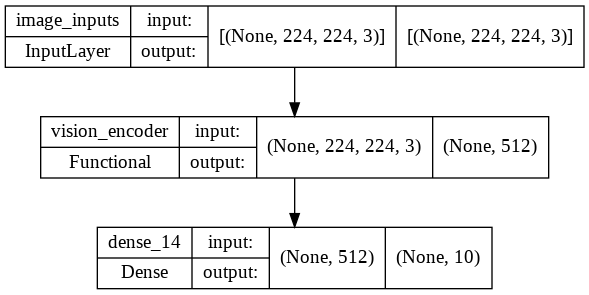

In [52]:
keras.utils.plot_model(multimodal_model, show_shapes=True)

In [42]:
multimodal_model.layers

In [53]:
history_fine = multimodal_model.fit(train_ds, validation_data=val_ds, epochs=50, verbose=2)

# y_pred = multimodal_model.predict(test_ds)
# y_pred = [np.argmax(i) for i in y_pred]

# y_true = []
# for element in test_ds:
#     y_true.extend(list(element[1].numpy()))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['text_inputs'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


44/44 - 16s - loss: 0.6234 - accuracy: 0.7910 - val_loss: 0.9093 - val_accuracy: 0.7077 - 16s/epoch - 370ms/step
Epoch 2/50
44/44 - 16s - loss: 0.5954 - accuracy: 0.8101 - val_loss: 0.9095 - val_accuracy: 0.7077 - 16s/epoch - 354ms/step
Epoch 3/50
44/44 - 16s - loss: 0.5854 - accuracy: 0.8133 - val_loss: 0.9098 - val_accuracy: 0.7106 - 16s/epoch - 354ms/step
Epoch 4/50
44/44 - 15s - loss: 0.5789 - accuracy: 0.8169 - val_loss: 0.9102 - val_accuracy: 0.7106 - 15s/epoch - 345ms/step
Epoch 5/50
44/44 - 15s - loss: 0.5726 - accuracy: 0.8176 - val_loss: 0.9110 - val_accuracy: 0.7135 - 15s/epoch - 341ms/step
Epoch 6/50
44/44 - 15s - loss: 0.5661 - accuracy: 0.8190 - val_loss: 0.9117 - val_accuracy: 0.7163 - 15s/epoch - 342ms/step
Epoch 7/50
44/44 - 15s - loss: 0.5597 - accuracy: 0.8208 - val_loss: 0.9117 - val_accuracy: 0.7163 - 15s/epoch - 352ms/step
Epoch 8/50
44/44 - 15s - loss: 0.5532 - accuracy: 0.8223 - val_loss: 0.9117 - val_accuracy: 0.7135 - 15s/epoch - 352ms/step
Epoch 9/50
44/44 - 